In [48]:
# Data imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
data = pd.read_csv('../data/news/news_part1.csv')
data

,Ticker,Title,URL,Time Published,Authors,Summary,Relevance Score,Ticker Sentiment Score,Ticker Sentiment Label,Technology,...,Retail & Wholesale,Economy - Monetary,Energy & Transportation,Life Sciences,Blockchain,IPO,Earnings,Mergers & Acquisitions,Manufacturing,Finance
0,META,Ads running on Meta saw return on spending inc...,https://www.business-standard.com/companies/ne...,2024-01-18 17:28:08,['Bloomberg'],Ads running on Meta Platforms Inc.'s apps saw ...,0.250386,0.424632,Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
1,AAPL,Ads running on Meta saw return on spending inc...,https://www.business-standard.com/companies/ne...,2024-01-18 17:28:08,['Bloomberg'],Ads running on Meta Platforms Inc.'s apps saw ...,0.250386,0.094962,Neutral,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2,HUM,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.298567,0.098222,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
3,AAPL,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.298567,0.098222,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
4,BAC,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.076358,0.045194,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79492,CRWD,2 Cybersecurity Stocks You Can Buy and Hold fo...,https://www.fool.com/investing/2023/08/27/2-cy...,2023-08-27 10:30:00,['Jeff Santoro'],These two companies have bright futures despit...,0.307731,0.219216,Somewhat-Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.999975,0.00000,0.000000,0.000000
79493,PATH,3 Supercharged Tech Stocks to Buy Without Any ...,https://www.fool.com/investing/2023/08/26/3-su...,2023-08-26 10:45:00,['Keithen Drury'],There are still some growth stocks available t...,0.472821,0.306128,Somewhat-Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.744043,0.00000,0.000000,0.000000
79494,CRWD,3 Supercharged Tech Stocks to Buy Without Any ...,https://www.fool.com/investing/2023/08/26/3-su...,2023-08-26 10:45:00,['Keithen Drury'],There are still some growth stocks available t...,0.425925,0.135673,Neutral,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.744043,0.00000,0.000000,0.000000
79495,DE,Weekly Roundup,https://aap.thestreet.com/story/16131864/1/wee...,2023-08-25 22:01:00,[],Stocks staged a late comeback this week after ...,0.020001,0.109825,Neutral,0.166667,...,0.166667,0.999682,0.166667,0.166667,0.0,0.310843,1.000000,0.77141,0.166667,0.166667


In [4]:
# Check duplicate rows in dataset
data=data.drop_duplicates()
data.count()

Ticker                        68175
Title                         68175
URL                           68175
Time Published                68175
Authors                       68175
Summary                       68175
Relevance Score               68175
Ticker Sentiment Score        68175
Ticker Sentiment Label        68175
Technology                    68175
Financial Markets             68175
Economy - Fiscal              68175
Economy - Macro               68175
Real Estate & Construction    68175
Retail & Wholesale            68175
Economy - Monetary            68175
Energy & Transportation       68175
Life Sciences                 68175
Blockchain                    68175
IPO                           68175
Earnings                      68175
Mergers & Acquisitions        68175
Manufacturing                 68175
Finance                       68175
dtype: int64

## Preprocessing Steps

In [5]:
# Tokenizing and converting the 'Summary' text data into sequences with a maximum vocabulary size of 5000 words.
# Padding the sequences for uniform length and displaying the first five tokenized entries.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Summary'].values)
X = tokenizer.texts_to_sequences(data['Summary'].values)
X = pad_sequences(X)
print("X tokenized data = ", X[:5]) 

X tokenized data =  [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
  4327 2296    7  239  452   29  774 4198  569  791    7  628  346   15
    41  369    4 1012   12    1  412    4  251  248  113   18  237 1200
   226]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0

In [7]:
# Map sentiment labels to numerical values using .loc to avoid SettingWithCopyWarning
sentiment_mapping = {
    'Bullish': 4,
    'Somewhat-Bullish': 3,
    'Neutral': 2,
    'Somewhat-Bearish': 1,
    'Bearish': 0
}
data.loc[:, 'SentimentLabel'] = data['Ticker Sentiment Label'].map(sentiment_mapping)

In [24]:
# Split the data into features and labels
X = X
y = data['SentimentLabel'].values

### Preparing Labels

In [25]:
# Convert labels to categorical format if using categorical_crossentropy
y = to_categorical(data['SentimentLabel'].values, num_classes=5)

### Splitting the Dataset into Training and Testing Sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
X_train.shape[1]

141

In [28]:
X_test.shape

(13635, 141)

In [29]:
y_train.shape

(54540, 5)

In [30]:
y_test.shape

(13635, 5)

## Approach Gated Recurrent Unit - RNN

### Building the Deep Learning Model

In [34]:
# Constructing a Sequential model with an Embedding layer, two GRU layers with dropout for regularization, 
# and a Dense layer for a 5-class classification using softmax activation.
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(GRU(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(GRU(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

### Compiling the Model

In [35]:
# Compile the model with categorical cross-entropy loss function, Adam optimizer, and accuracy as the metric.
# The adam optimizer is chosen for several reasons:
# 1. It is known for being computationally efficient, requiring relatively low memory.
# 2. It maintains a learning rate for each network parameter (weight) and adapts these rates throughout the training process.
# 3. It is faster than other optimizers like stochastic gradient descent (SGD), especially in complex neural networks and large datasets.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 141, 256)          1280000   
                                                                 
 dropout_3 (Dropout)         (None, 141, 256)          0         
                                                                 
 gru_6 (GRU)                 (None, 141, 256)          394752    
                                                                 
 gru_7 (GRU)                 (None, 256)               394752    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 2070789 (7.90 MB)
Trainable params: 2070789 (7.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the Model

In [40]:
batch_size = 64  
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=4, batch_size=batch_size, verbose=1, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/4
853/853 [==============================] - 1688s 2s/step - loss: 0.6954 - accuracy: 0.7174 - val_loss: 0.7635 - val_accuracy: 0.6978
Epoch 2/4
853/853 [==============================] - 1860s 2s/step - loss: 0.6653 - accuracy: 0.7257 - val_loss: 0.7695 - val_accuracy: 0.6930
Epoch 3/4
853/853 [==============================] - 1845s 2s/step - loss: 0.6432 - accuracy: 0.7323 - val_loss: 0.7758 - val_accuracy: 0.6972
Epoch 4/4
853/853 [==============================] - 1839s 2s/step - loss: 0.6246 - accuracy: 0.7400 - val_loss: 0.7918 - val_accuracy: 0.7016


### Evaluating the Model

In [41]:
# Evaluate the model's performance on the test set and print out the test accuracy as a percentage.
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

427/427 [==============================] - 145s 340ms/step - loss: 0.7918 - accuracy: 0.7016
Test Accuracy: 70.16%


In [42]:
# Making predictions 
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

427/427 [==============================] - 111s 259ms/step


In [43]:
inverse_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}

# Map the predicted classes back to original labels
predicted_labels = [inverse_sentiment_mapping[i] for i in predicted_classes]

# Now you can compare 'predicted_labels' with the true labels from 'y_test'
# If 'y_test' is not one-hot encoded, you can compare directly
# If 'y_test' is one-hot encoded, you'll need to convert it back to labels first
true_labels = np.argmax(y_test, axis=1)
true_labels = [inverse_sentiment_mapping[i] for i in true_labels]

# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=inverse_sentiment_mapping.values())
print(report)



Accuracy: 70.16%
                  precision    recall  f1-score   support

         Bullish       0.42      0.10      0.16        83
Somewhat-Bullish       0.49      0.22      0.31       924
         Neutral       0.75      0.90      0.82      9053
Somewhat-Bearish       0.39      0.06      0.11       434
         Bearish       0.51      0.36      0.43      3141

        accuracy                           0.70     13635
       macro avg       0.51      0.33      0.36     13635
    weighted avg       0.66      0.70      0.67     13635



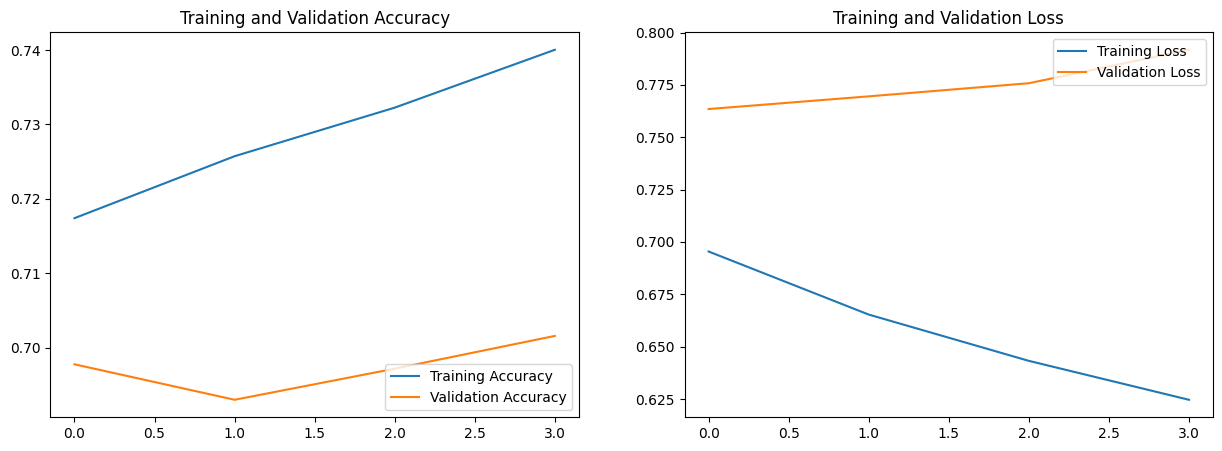

In [46]:
# Plotting training and validation accuracy and loss over epochs to assess model performance.
# The figure consists of two subplots: one for accuracy and another for loss, each with training and validation curves.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

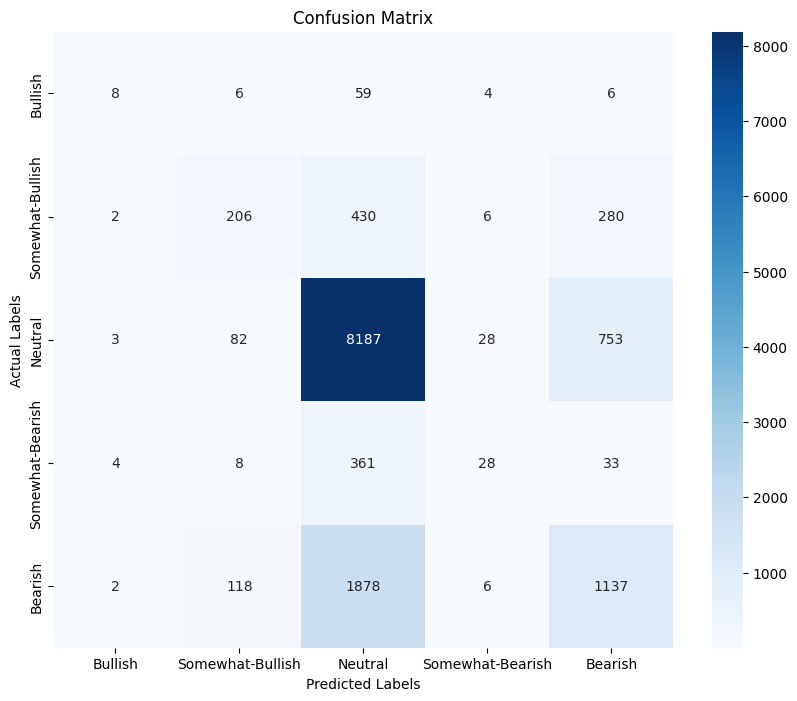

In [49]:
# Generating and plotting a confusion matrix using seaborn's heatmap to visualize the performance of a classification model.
# The matrix compares actual vs. predicted labels with labels annotated, and axes labeled using the inverse sentiment mapping.
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=inverse_sentiment_mapping.values(),
            yticklabels=inverse_sentiment_mapping.values())
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()